# Evaluation of resident time #

Formula to evaluate ideal resident time for 1 reactor
$$ E(t)=\dfrac{1}{\tau}e^{-t/\tau} $$ 

Where $ \tau=\dfrac{Q}{V} $ where $Q$ is the volumetric flow rate and $V$ is the Volume.

Formula to evaluate ideal comulative time
$$ F(t) = 1-e^{-t/\tau} $$

In [1]:
import os
import numpy as np
import pandas as pd
import scipy as sp
import glob
import matplotlib.pyplot as plt 

In [2]:
plt.rcParams.update({'font.size' : 16})

### Diameter impact ###
Reading Numerical simualtions files

In [3]:
WorkingDir=r'C:\Users\geron-ma\OneDrive - TUV SUD\Projects-Files\A4I-R10-025_I-Phyc\04_FLUENT\00_RTD_Lights'
#WorkingDir=r'C:\Users\geron-ma\OneDrive - TUV SUD\Projects-Files\A4I-R10-025_I-Phyc\04_FLUENT\Baseline_Geometry'
scenario=r'02_Impeller\New_Simulations'
baseline='Baseline_Geometry\Baseline'
file_path=os.path.join(WorkingDir,scenario,'*.out')
files=glob.glob(file_path)
#Base_file=os.path.join(WorkingDir,baseline,'RTD-baseline.his')
#files.append(Base_file)
#Base_file_avg=os.path.join(WorkingDir,baseline,'RTD-baseline-100.his')
#files.append(Base_file_avg)

In [4]:
files

['C:\\Users\\geron-ma\\OneDrive - TUV SUD\\Projects-Files\\A4I-R10-025_I-Phyc\\04_FLUENT\\00_RTD_Lights\\02_Impeller\\New_Simulations\\tracer-concentration-rpm15-rfile.out',
 'C:\\Users\\geron-ma\\OneDrive - TUV SUD\\Projects-Files\\A4I-R10-025_I-Phyc\\04_FLUENT\\00_RTD_Lights\\02_Impeller\\New_Simulations\\tracer-concentration-rpm30-rfile.out',
 'C:\\Users\\geron-ma\\OneDrive - TUV SUD\\Projects-Files\\A4I-R10-025_I-Phyc\\04_FLUENT\\00_RTD_Lights\\02_Impeller\\New_Simulations\\tracer-concentration-rpm60-rfile.out']

In [5]:
data_frames={}  #create dictionary

In [6]:
time_array={}
RTD_array={}
N_particles={}

In [7]:
cases = ['15-rpm','30-rpm','60-rpm']

In [8]:
for file, sim in zip (files, cases):
    #cases.append(dim)
    data_frames[sim]=pd.read_csv(file, sep=' ', skiprows=3 , names=['iter','E_num','t_num'])
    data_frames[sim]=data_frames[sim].iloc[:-1,:]
    time_array[sim]=data_frames[sim]['t_num'].to_numpy(dtype='float64')
    RTD_array[sim]=data_frames[sim]['E_num'].to_numpy(dtype='float64')

In [9]:
RTD_array
cases

['15-rpm', '30-rpm', '60-rpm']

## Characteristic of the reactor ##

In [10]:
#Q= 0.000347/1020   # m^3/s
Q= 2.31/998
V=3.2*2.5*3.0 # be carefull with units 
tau=V/2/Q
print(tau)

5184.415584415585


In [11]:
t=np.linspace (0, 65000,100)

In [12]:
E_t=(1/tau)*np.exp(-t/tau)

In [13]:
F_t=1-np.exp(-t/tau)

In [14]:
teta=t/tau
E_teta=np.exp(-teta)
E_teta_2=teta*np.exp(-teta)

In [15]:
I0={}
I1={}
tau_num={}

In [17]:
for case in cases:
    I0[case]=sp.integrate.simpson(RTD_array[case],time_array[case],axis=0)
    I1[case]=sp.integrate.simpson(RTD_array[case]*time_array[case],time_array[case],axis=0)
    tau_num[case]=I1[case]/I0[case]
    RTD_array[case]=RTD_array[case]/I0[case]

In [18]:
tau_num

{'15-rpm': 10381.767596765323,
 '30-rpm': 10523.314451475168,
 '60-rpm': 10766.20386507009}

In [19]:
I0

{'15-rpm': 56.948565182017155,
 '30-rpm': 63.71118569171463,
 '60-rpm': 55.01498450984134}

## Figure template ##

Define a dictionari for the color and a dictionary for the line stile to be used

In [20]:
col={
    cases[0]:'b',
    cases[1]:'c',
    cases[2]:'g',
    #cases[3]:'m',
    #cases[4]:'r'
}
stile={
    cases[0]:'o',
    cases[1]:'s',
    cases[2]:'*',
    #cases[3]:'v',
    #cases[4]:'>'
}

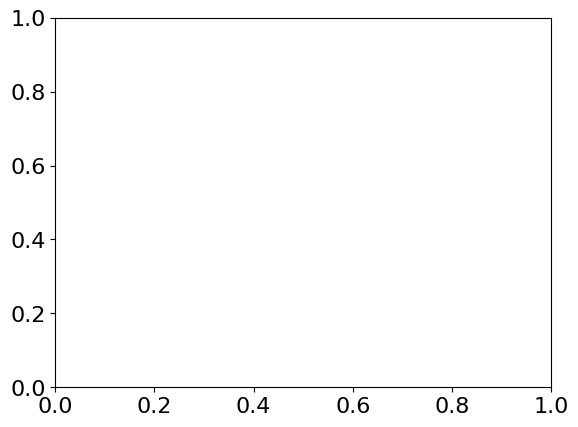

In [21]:
fig, ax = plt.subplots()

In [22]:
plt.ioff()

In [23]:
fig, ax3 = plt.subplots()

In [24]:
ax3.plot(teta, E_t*tau,label='Ideal')
ax3.plot(teta,E_teta_2, label='Ideal-N=2')
for case in cases:
    #ax3.plot(time_array[case]/tau_num[case],RTD_array[case]*tau_num[case],label=case,marker=stile[case],linestyle='--',color=col[case])
    ax3.plot(time_array[case]/tau,RTD_array[case]*tau,label=case,linestyle='--',color=col[case])

In [25]:
ax3.legend()
ax3.set_xlabel(r'$ \theta $')
ax3.set_ylabel(r'E( $ \theta $ )')
ax3.title.set_text('RTD')

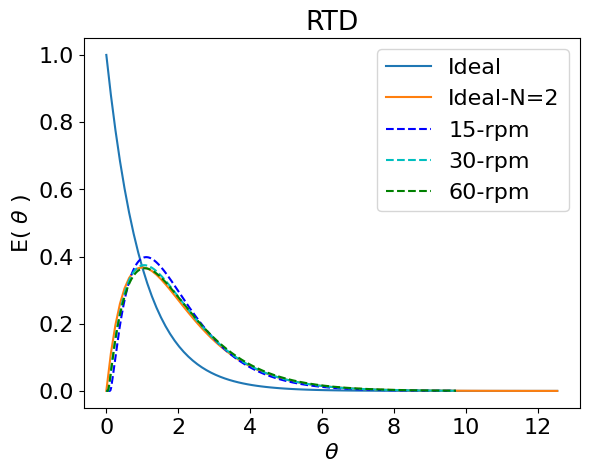

In [26]:
plt.show()

In [ ]:
tau_num

## Data Fitting ##

In [ ]:
def weib(x, c, scale):
    return (c /scale)* (x/scale) **(c - 1) * np.exp(-(x/scale)**c)

In [ ]:
cases_100=[cases[0]]
cases_100.append(cases[3])

In [ ]:
p , d =sp.optimize.curve_fit(weib,time_array[cases_100[0]]/tau,RTD_array[cases_100[0]]*tau)

In [ ]:
pb, d =sp.optimize.curve_fit(weib,time_array[cases_100[1]]/tau,RTD_array[cases_100[1]]*tau)

In [ ]:
print("Shape (p):", p)
print("Scale (pb):", pb)

In [ ]:
tetap=np.linspace(0,5,1000)

In [ ]:
fig, ax = plt.subplots()

In [ ]:
case=cases[1]
ax.plot(time_array[case]/tau,RTD_array[case]*tau,label=case,marker=stile[case],linestyle='--',color=col[case])

In [ ]:
case=cases[2]
ax.plot(time_array[case]/tau,RTD_array[case]*tau,label=case,marker=stile[case],linestyle='--',color=col[case])

In [ ]:
#ax.plot(time_array['baseline']/tau, weib(time_array['baseline']/tau,p1[0]))
ax.plot(tetap, sp.stats.weibull_min.pdf(tetap,p[0],scale=p[1],loc=0),label='Data-fit-Rotated',color='c')
ax.plot(tetap, sp.stats.weibull_min.pdf(tetap,pb[0],scale=pb[1],loc=0),label='Data-fit-Baseline',color='g')

In [ ]:
#ax.plot(tetap, sp.stats.weibull_min.pdf(tetap,1.54,scale=0.87,loc=0))
#ax.plot(tetap, sp.stats.weibull_min.pdf(tetap,1.6161544,scale=1.6161544,loc=0))
#case=cases[3]
#ax.plot(time_array['baseline']/tau, RTD_array['baseline']*tau, label=case,marker=stile[case],linestyle='--',color=col[case])
ax.plot(teta,E_teta_2, label='Ideal-N=2',color='tab:orange')

In [ ]:
ax.legend()
ax.set_xlabel(r'$ \theta $')
ax.set_ylabel(r'E( $ \theta $ )')
ax.title.set_text('RTD')

In [ ]:
plt.show()

In [ ]:
f1=sp.stats.weibull_min.pdf(tetap,p[0],scale=p[1],loc=0)

In [ ]:
f2=sp.stats.weibull_min.pdf(tetap,pb[0],scale=pb[1],loc=0)

In [ ]:
E_teta_2=tetap*np.exp(-tetap)

In [ ]:
def f(t):
    return (sp.stats.weibull_min.pdf(t,p[0],scale=p[1],loc=0)-t*np.exp(-t))
    

In [ ]:
int=sp.optimize.fsolve(f, 1.0)

In [ ]:
def fb(t):
    return (sp.stats.weibull_min.pdf(t,pb[0],scale=pb[1],loc=0)-t*np.exp(-t))

In [ ]:
int_b=sp.optimize.fsolve(fb, 1.0)

In [ ]:
print ('baseline inter %2.2f , modified %2.2f' %(int_b,int))

In [ ]:
sp.integrate.fixed_quad(fb,0,int_b)

In [ ]:
sp.integrate.fixed_quad(f,0,int)

In [ ]:
def f1(t):
    return (sp.stats.weibull_min.pdf(t,p[0],scale=p[1],loc=0))

In [ ]:
sp.integrate.fixed_quad(f1,0,int)

In [ ]:
def f2(t): 
    return (sp.stats.weibull_min.pdf(t,pb[0],scale=pb[1],loc=0))

In [ ]:
sp.integrate.fixed_quad(f2,0,int_b)